In [7]:
data(LifeCycleSavings)

In [8]:
which(rownames(LifeCycleSavings) %in% c("Japan", "Libya", "Jamaica", "Zambia"))

[1] 23 46 47 49

In [9]:
LifeCycleSavings = LifeCycleSavings[-c(23, 46, 47, 49), ] 
# we should find nothing now
which(rownames(LifeCycleSavings) %in% c("Japan", "Libya", "Jamaica", "Zambia"))

integer(0)

In [10]:
dpi = LifeCycleSavings$dpi
sr = LifeCycleSavings$sr
ddpi = LifeCycleSavings$ddpi
pop15 = LifeCycleSavings$pop15
pop75 = LifeCycleSavings$pop75

In [11]:
models = new.env()

### `sr ~ dpi * ddpi`

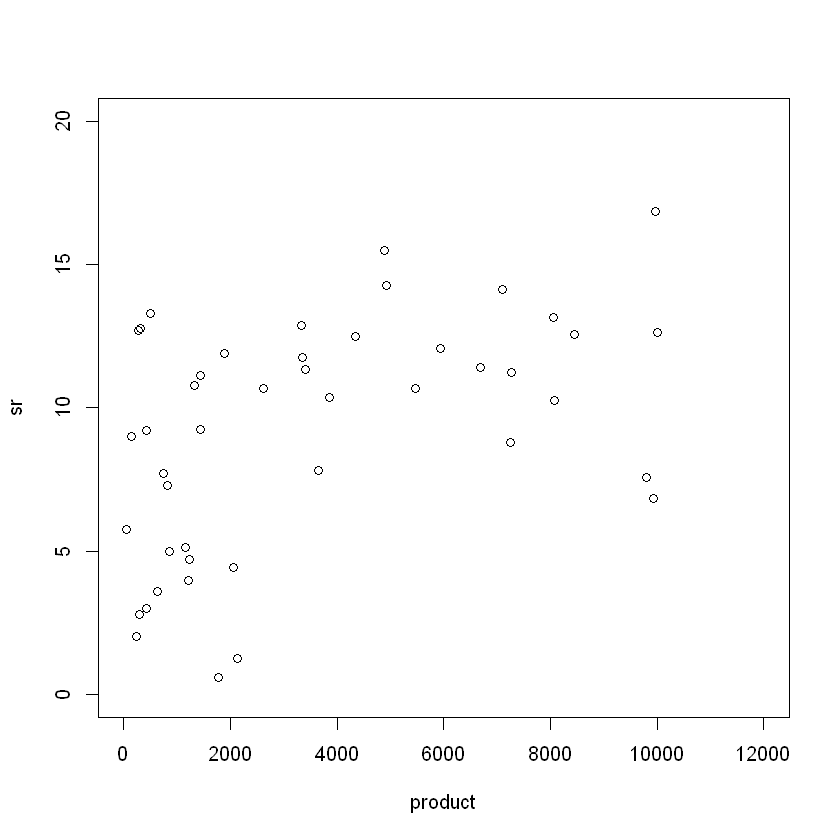

In [6]:
product = dpi*ddpi
plot(sr ~ product, xlim = c(0, 12000), ylim = c(0, 20))

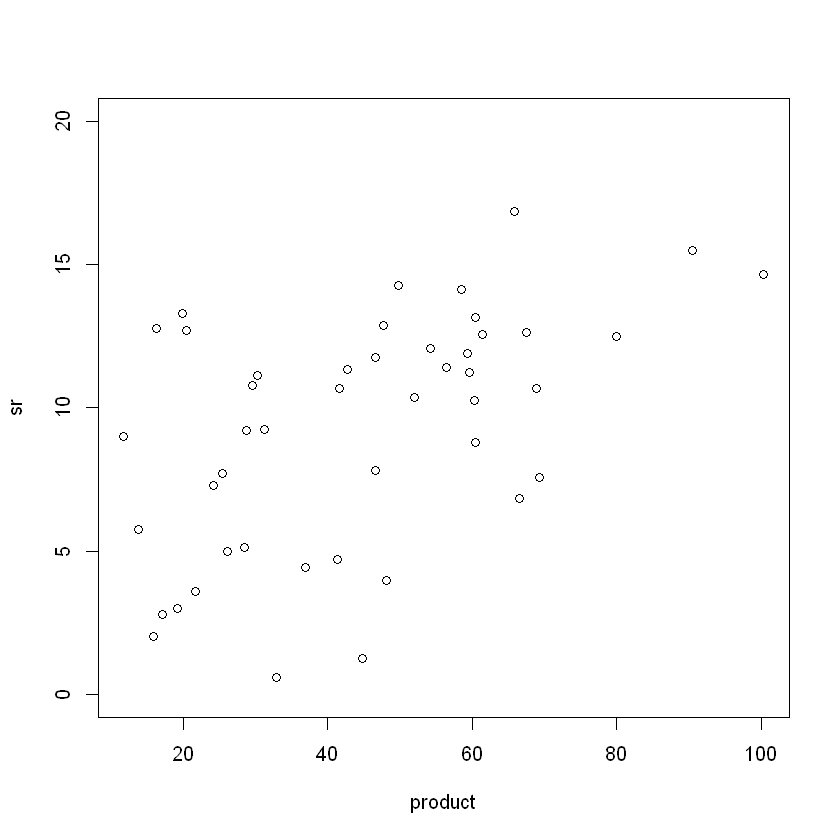

In [46]:
product = sqrt(dpi) + ddpi^2
plot(sr ~ product, ylim = c(0, 20))

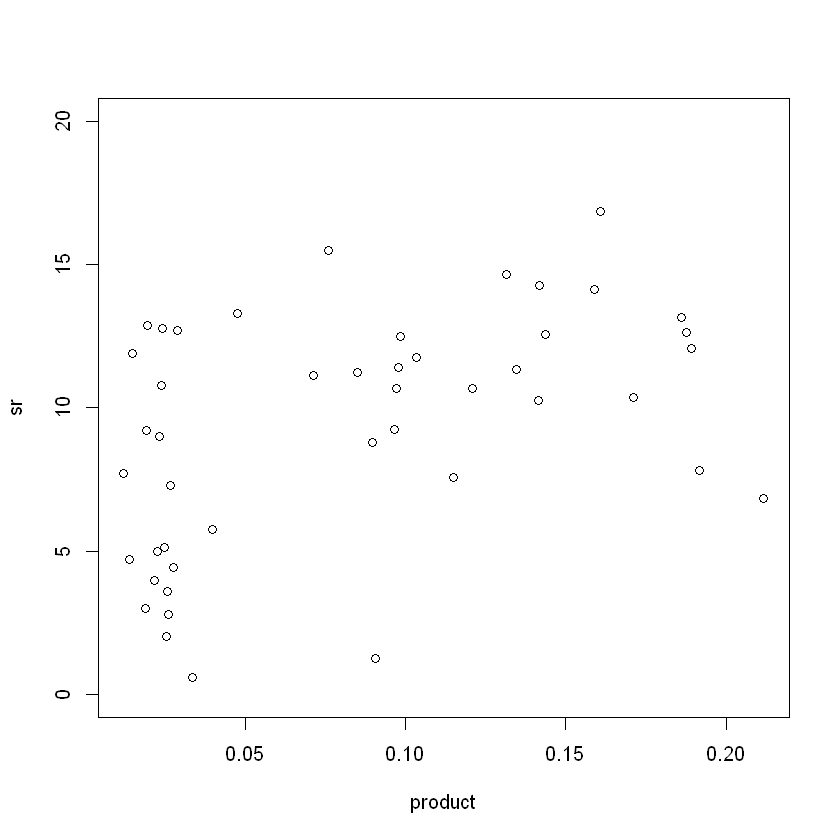

In [56]:
product = (pop75/pop15)
plot(sr ~ product, ylim = c(0, 20))

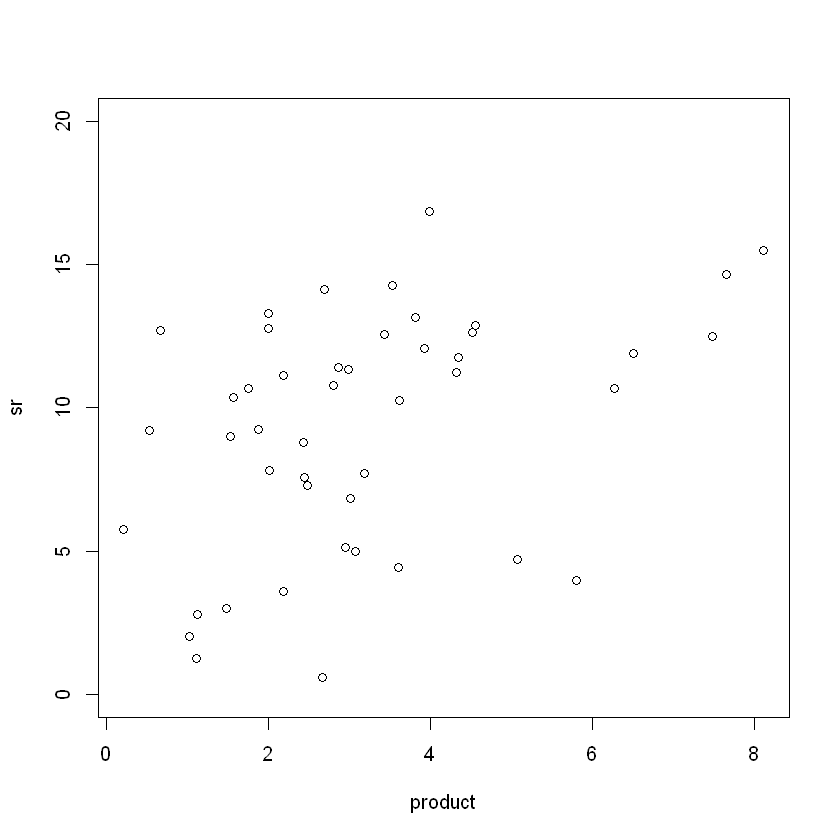

In [57]:
product = ddpi
plot(sr ~ product, ylim = c(0, 20))

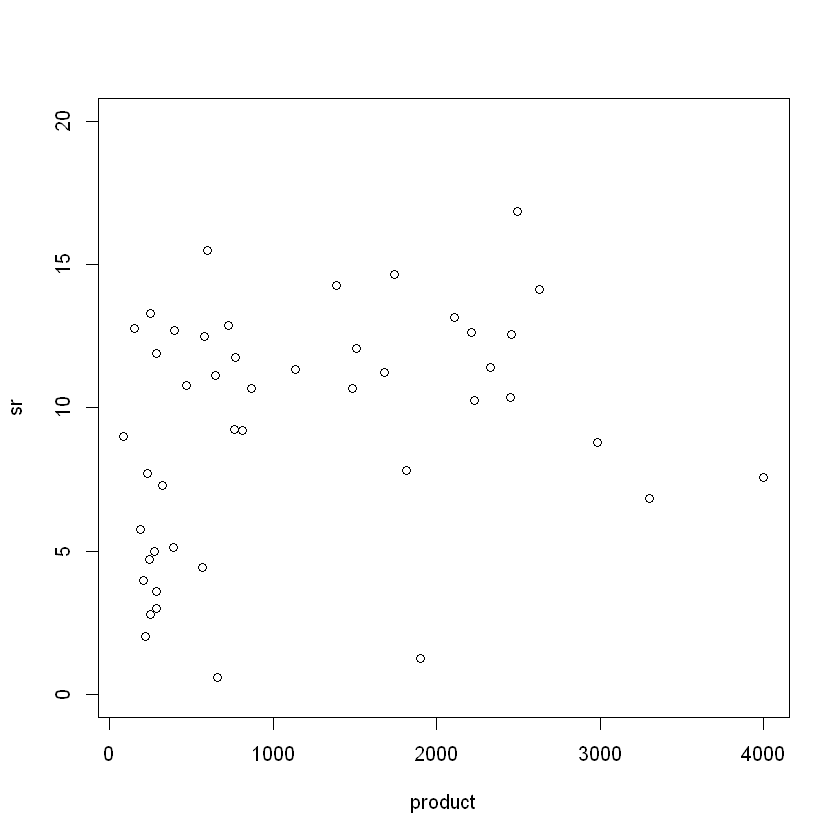

In [60]:
product = dpi 
plot(sr ~ product, ylim = c(0, 20))

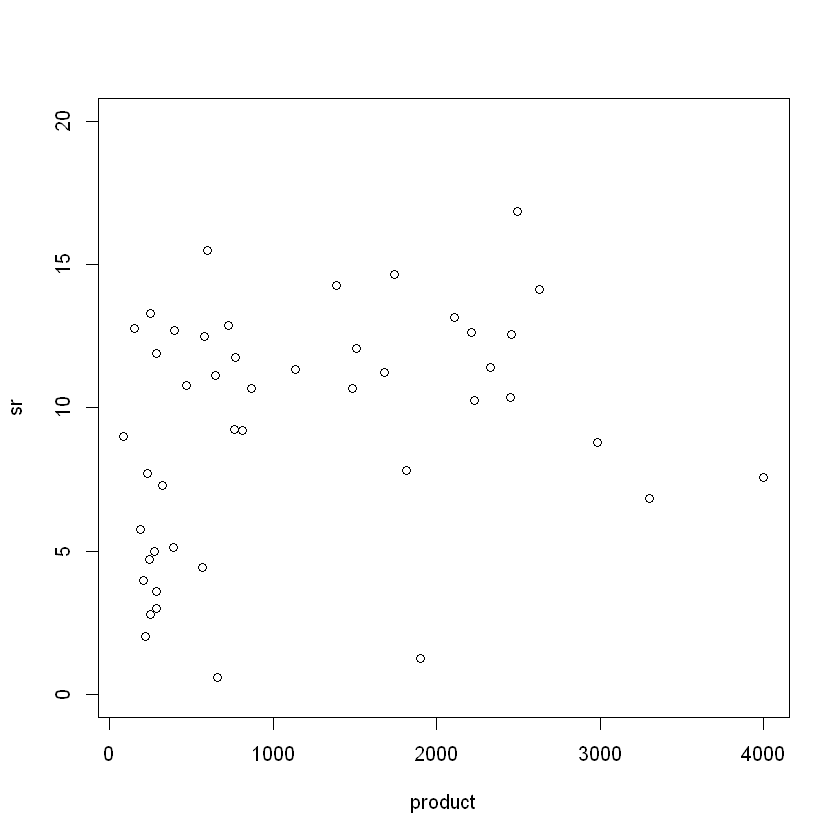

In [124]:
product = dpi
plot(sr ~ product, ylim = c(0, 20))

In [154]:
models$model_dpi = lm(sr ~ I(sqrt(dpi) + ddpi^2) , data = LifeCycleSavings)
summary(models$model_dpi)


Call:
lm(formula = sr ~ I(sqrt(dpi) + ddpi^2), data = LifeCycleSavings)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.0427 -2.5240  0.3877  2.2678  6.4910 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)            4.82211    1.23075   3.918 0.000308 ***
I(sqrt(dpi) + ddpi^2)  0.10014    0.02495   4.013 0.000230 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.563 on 44 degrees of freedom
Multiple R-squared:  0.2679,	Adjusted R-squared:  0.2513 
F-statistic:  16.1 on 1 and 44 DF,  p-value: 0.0002296


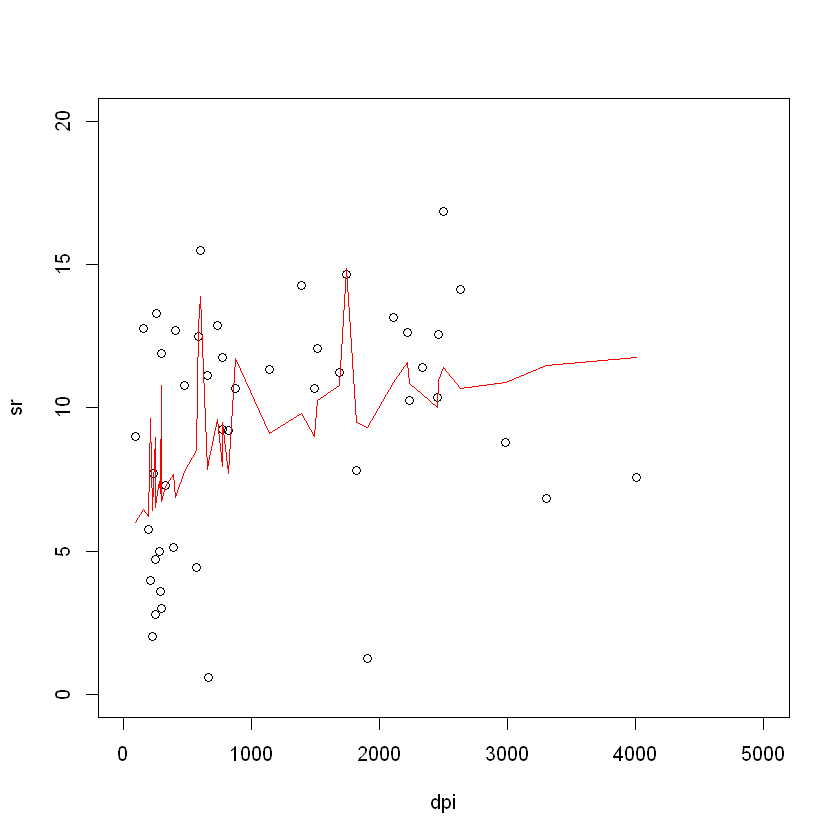

In [158]:
newdat = data.frame(sr, dpi, ddpi)
newdat = newdat[order(dpi),] 
pred = predict(models$model_dpi, newdata = newdat)
plot(sr ~ dpi, xlim = c(0, 5000), ylim = c(0, 20))
with(newdat, lines(x = dpi, y = pred, col = 'red'))